Задание 1

Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?

2) Критикам нравятся больше игры на PC или на PS4?

3) Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

сформулируйте нулевую и альтернативную гипотезы;
выберите пороговый уровень статистической значимости;
опишите полученные результаты статистического теста.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import copy
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/IlyaShirmanov/Portfolio_Data_Science_Files/main/vgsales.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Изучим датафрейм
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


 Как критики относятся к спортивным играм?

In [ ]:
#удалим отсутствующие значения
df = df.dropna(subset=['Critic_Score'])

In [ ]:
#Посмотрим среднюю оценку критиков по жанрам 
df_Genre_mean = df[['Genre', 'Critic_Score']].groupby('Genre').mean().reset_index().sort_values('Critic_Score')
df_Genre_mean

,Genre,Critic_Score
1,Adventure,65.331269
3,Misc,66.619503
0,Action,66.629101
5,Puzzle,67.424107
6,Racing,67.963612
4,Platform,68.058350
9,Simulation,68.619318
2,Fighting,69.217604
8,Shooter,70.181144
10,Sports,71.968174


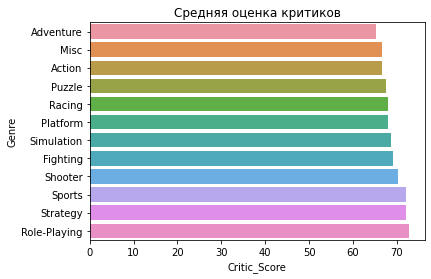

In [ ]:
#Визуализируем среднюю оценку критиков по жанрам
sns.barplot(x='Critic_Score', y='Genre', data=df_Genre_mean).set_title('Средняя оценка критиков')
plt.show()

In [ ]:
#Видим что жанр Sports находится на 3-ем месте
#Выдвенем гипотезы что:
#1. Средняя оценка критиков жанра Sports не отличается статистически значимо от средней оценки жанра Role-Playing
#    H0 - Средняя оценка критиков жанра Sports = Средняя оценка жанра Role-Playing
#    Н1 - Средняя оценка критиков жанра Sports != Средняя оценка жанра Role-Playing
#2. Средняя оценка критиков жанра Sports не отличается статистически значимо от средней оценки жанра Strategy
#    H0 - Средняя оценка критиков жанра Sports = Средняя оценка жанра Strategy
#    Н1 - Средняя оценка критиков жанра Sports != Средняя оценка жанра Strategy
# Применим поправку Бонферони 

In [ ]:
df_Sports = df.loc[df['Genre'] == 'Sports']
df_Role_Playing = df.loc[df['Genre'] == 'Role-Playing']
df_Strategy = df.loc[df['Genre'] == 'Strategy']

In [ ]:
#Посмотрим кол-во данных, приведем к одинаковым объемам выборки.
print(df_Sports['Critic_Score'].count())
print(df_Role_Playing['Critic_Score'].count())
print(df_Strategy['Critic_Score'].count())

1194
737
302


In [ ]:
df_Sports = df_Sports.sample(df_Strategy['Critic_Score'].count())
df_Role_Playing = df_Role_Playing.sample(df_Strategy['Critic_Score'].count())
print(df_Sports['Critic_Score'].count())
print(df_Strategy['Critic_Score'].count())

302
302


In [ ]:
alpha = 0.05/2
result = st.ttest_ind(df_Sports['Critic_Score'], df_Role_Playing['Critic_Score'], equal_var=False)
print(result)
print(df_Sports['Critic_Score'].mean())
print(df_Role_Playing['Critic_Score'].mean())

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, Средняя оценка критиков жанра Sports != Средняя оценка жанра Role-Playing')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.3196602278284492, pvalue=0.7493414682158415)
71.15894039735099
71.50993377483444
Не отвергаем нулевую гипотезу


In [ ]:
alpha = 0.05/2
result_1 = st.ttest_ind(df_Sports['Critic_Score'], df_Strategy['Critic_Score'], equal_var=False)
print(result)
print(df_Sports['Critic_Score'].mean())
print(df_Strategy['Critic_Score'].mean())

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, Средняя оценка критиков жанра Sports = Средняя оценка жанра Strategy')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.3196602278284492, pvalue=0.7493414682158415)
71.15894039735099
72.08609271523179
Не отвергаем нулевую гипотезу


In [ ]:
#Вывод: при данном наборе данных, мы не можем отвергнуть гипотезу о том, что критики относятся к жанру Sports так же как и к жанрам Role-Playing и Strategy.

Критикам нравятся больше игры на PC или на PS4?

In [ ]:
df_PC = df.loc[df['Platform'] == 'PC']
df_PS4 = df.loc[df['Platform'] == 'PS4']

In [ ]:
#Посмотрим кол-во данных, приведем к одинаковым объемам выборки.
print(df_PC['Critic_Score'].count())
print(df_PS4['Critic_Score'].count())

715
252


In [ ]:
df_PC = df_PC.sample(df_PS4['Critic_Score'].count())
df_PC['Critic_Score'].count()

252

In [ ]:
#    H0 - Критикам нравятся меньше либо так же игры на PC чем на PS4
#    Н1 - Критикам нравятся больше игры на PC чем на PS4

In [ ]:
alpha = 0.05
result = st.ttest_ind(df_PC['Critic_Score'], df_PS4['Critic_Score'], alternative='greater', equal_var=False)
print(df_PC['Critic_Score'].mean())
print(result)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, Критикам нравятся больше игры на PC чем на PS4')
else:
    print('Не отвергаем нулевую гипотезу')

76.37301587301587
Ttest_indResult(statistic=4.072469406973987, pvalue=2.7078090908923937e-05)
Отвергаем нулевую гипотезу, Критикам нравятся больше игры на PC чем на PS4


In [ ]:
#Вывод: при данном наборе данных, мы отвергаем нулевую гипотезу, Критикам нравятся больше игры на PC чем на PS4

Критикам больше нравятся стрелялки или стратегии?

In [ ]:
#    H0 - Критикам меньше либо так же нравятся стратегии чем стрелялки
#    Н1 - Критикам больше нравятся стратегии чем стрелялки

In [ ]:
df_Shooter = df.loc[df['Genre'] == 'Shooter']

In [ ]:
#Посмотрим кол-во данных, приведем к одинаковым объемам выборки.
print(df_Shooter['Critic_Score'].count())
print(df_Strategy['Critic_Score'].count())

944
302


In [ ]:
df_Shooter = df_Shooter.sample(df_Strategy['Critic_Score'].count())
df_Shooter['Critic_Score'].count()

302

In [ ]:
alpha = 0.05
result = st.ttest_ind(df_Strategy['Critic_Score'], df_Shooter['Critic_Score'], alternative='greater', equal_var=False)
print(df_PC['Critic_Score'].mean())
print(result)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, Критикам больше нравятся стратегии чем стрелялки')
else:
    print('Не отвергаем нулевую гипотезу')

76.37301587301587
Ttest_indResult(statistic=1.3613100184764033, pvalue=0.08697253893401714)
Не отвергаем нулевую гипотезу


In [ ]:
#при данном наборе данных, мы отвергаем нулевую гипотезу, Критикам меньше либо так же нравятся стратегии чем стрелялки
#проведем еще один тест на это раз двухсторонний, т.к. есть вероятность что критикам одинаково нравятся как стрелялки так и стратегии
#    H0 - Критикам одинаково нравятся как стрелялки так и стратегии
#    Н1 - Критикам не одинаково нравятся как стрелялки так и стратегии

In [ ]:
alpha = 0.05
result = st.ttest_ind(df_Strategy['Critic_Score'], df_Shooter['Critic_Score'], alternative='two-sided', equal_var=False)
print(df_PC['Critic_Score'].mean())
print(result)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, Критикам больше нравятся стратегии чем стрелялки')
else:
    print('Не отвергаем нулевую гипотезу')

76.37301587301587
Ttest_indResult(statistic=1.3613100184764033, pvalue=0.1739450778680343)
Не отвергаем нулевую гипотезу


In [ ]:
#Вывод: при данном наборе данных, мы не можем отвергнуть гипотезу о том, что Критикам одинаково нравятся как стрелялки так и стратегии

Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;

2) Удалите мусорные символы;

3) Удалите стоп-слова;

4) Привидите все слова к нормальной форме;

5) Преобразуйте все сообщения в вектора TF-IDF. 

Вам поможет следующий код:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
Можете поэкспериментировать с параметрами TfidfVectorizer;

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;

7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;

8) Опишите результаты при помощи confusion_matrix;

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [ ]:
df_text = pd.read_csv('https://raw.githubusercontent.com/IlyaShirmanov/Portfolio_Data_Science_Files/main/spam.csv')
df_text

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#Создадим целевую переменную, заменим значения на 0 и 1
category = df_text['Category']
category

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [ ]:
category_boll = category.replace({'ham' : 1, 'spam' : 0})
category_boll = np.array(category_boll)
category_boll

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
#Привидем весь текст к нижнему регистру
#Удалим мусорные символы
#Удалим стоп-слова
#Привидием все слова к нормальной форме
message = df_text['Message']
message

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
message_lower_case = message.str.lower()
message_lower_case

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
only_words_message = message_lower_case.replace('[\W_]+', ' ', regex=True)
only_words_message

0       go until jurong point crazy available only in ...
1                                ok lar joking wif u oni 
2       free entry in 2 a wkly comp to win fa cup fina...
3            u dun say so early hor u c already then say 
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home 
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
nltk.download('stopwords')
stopwords_set = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stopwords_set))
without_message = only_words_message.str.replace(pat, ' ')
without_message = without_message.str.replace(r'\s+', ' ')
without_message

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


0       go jurong point crazy available bugis n great ...
1                                ok lar joking wif u oni 
2       free entry 2 wkly comp win fa cup final tkts 2...
3                    u dun say early hor u c already say 
4                  nah think goes usf lives around though
                              ...                        
5567     2nd time tried 2 contact u u 750 pound prize ...
5568                         ü b going esplanade fr home 
5569                               pity mood suggestions 
5570     guy bitching acted like interested buying som...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [ ]:
def lemmatize_text(text):
    '''
    Лематизирует текст.
    Принимает на вход Series
    Строковые значения
    '''
    lemma = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    lemma_list = ''
    for i in lemma:
      lemma_list += str(i)+ ' '
    return lemma_list

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatized_message = without_message.apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
lemmatized_message

0       go jurong point crazy available bugis n great ...
1                                ok lar joking wif u oni 
2       free entry 2 wkly comp win fa cup final tkts 2...
3                    u dun say early hor u c already say 
4                    nah think go usf life around though 
                              ...                        
5567    2nd time tried 2 contact u u 750 pound prize 2...
5568                         ü b going esplanade fr home 
5569                                pity mood suggestion 
5570    guy bitching acted like interested buying some...
5571                                      rofl true name 
Name: Message, Length: 5572, dtype: object

In [ ]:
#Преобразуем все сообщения в вектора TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(lemmatized_message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Разделим данные на тестовые и тренировочные в соотношении 30/70
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, category_boll, test_size=0.30, random_state=42)

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)

In [ ]:
#Получим результаты при помощи confusion_matrix;
confusion_matrix(y_test, y_pred)

array([[ 173,   51],
       [   3, 1445]])

In [ ]:
#вывод:
#173 звонка модель классифицировала правильно это спам.
#1445 звонков модель классифицировала правильно это полезные звонки.
#51 звонок модель ошиблась, классифицировала как полезный хотя оказался спамом
#3 звонка модель ошиблась, классифицировала как спам хотя они были полезные

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, y_pred]).T
result.columns= ['test sample', 'model result']
result

,test sample,model result
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1667,1,1
1668,0,0
1669,1,1
1670,0,0


In [ ]:
#Построим датафрейм, который будет содержать все исходные тексты сообщений,
#классифицированные неправильно (с указанием фактического и предсказанного)
model_error = copy.copy(X_test)
model_error['Message'] = df_text['Message']
model_error['Category'] = df_text['Category']
model_error = model_error.reset_index()
model_error['model result'] = result['model result']
model_error = model_error[['Message',  'model result', 'Category']]
model_error['model result'] = model_error['model result'].replace({1 :'ham',  0:'spam'})
model_error = model_error[model_error['Category'] != model_error['model result']]

In [ ]:
model_error

,Message,model result,Category
22,Err... Cud do. I'm going to at 8pm. I haven't...,spam,ham
40,Reminder: You have not downloaded the content ...,ham,spam
47,Guess what! Somebody you know secretly fancies...,ham,spam
74,Oh my god! I've found your number again! I'm s...,ham,spam
84,Your next amazing xxx PICSFREE1 video will be ...,ham,spam
160,Babe: U want me dont u baby! Im nasty and have...,ham,spam
166,"I want some cock! My hubby's away, I need a re...",ham,spam
194,Hello. They are going to the village pub at 8 ...,spam,ham
234,Hello darling how are you today? I would love ...,ham,spam
260,Guess what! Somebody you know secretly fancies...,ham,spam
